# Comparison exploration

## Library imports

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline
pd.options.mode.chained_assignment = None

## Function definitions

In [41]:
def polyfitEq(x,y):
    C= np.polyfit(x,y,1)
    m=C[0]
    b=C[1]
    return 'y = x*{} + {}'.format(m,b)
def calibrate(x,y):
    C= np.polyfit(x,y,1)
    m=C[0]
    b=C[1]
    return x*m+b
def rename_labels(obj,unit):
    obj.columns=obj.columns.map(lambda x: x.replace('2',' stc_cdmb'))
    obj.columns=obj.columns.map(lambda x: x+' '+unit)
    return obj.columns



## Data Processing
Loads the Arduair and the estation data processed. and merge it in the common datetimes

In [42]:
# Read
dataArd=pd.read_csv('ARDUAIR_ACROPOLIS_PROCESADO.csv').set_index('datetime')
dataEst=pd.read_csv('ESTACION_ACROPOLIS_PROCESADO.csv').set_index('datetime')
df=pd.concat([dataArd,dataEst], join='inner', axis=1).reset_index()
df

,datetime,Hum,Temp,Pr,L,pm10,pm25,o3,co,so2,Temp2,Hum2,Pr2,L2,Prep
0,2017-03-24 12:00:00,55.367257,20.938938,911.420088,302.045000,0.0,0.0,0.0,0.0,0.0,25.1,79.0,681.9,784.0,0.00
1,2017-03-24 13:00:00,37.249000,34.807000,908.101900,13916.860000,0.0,0.0,0.0,0.0,0.0,24.9,80.0,681.1,623.0,0.00
2,2017-03-24 14:00:00,28.104624,38.624855,908.501734,NaN,0.0,0.0,0.0,0.0,0.0,25.5,77.0,680.3,670.0,0.00
3,2017-03-24 15:00:00,27.068966,38.458046,907.855575,NaN,0.0,0.0,0.0,0.0,0.0,25.2,76.0,679.8,575.0,0.00
4,2017-03-24 16:00:00,33.055172,34.869540,907.619138,NaN,0.0,0.0,0.0,0.0,0.0,25.4,77.0,679.8,299.0,0.00
5,2017-03-24 17:00:00,41.222989,32.107471,908.008161,12260.803246,0.0,0.0,0.0,0.0,0.0,24.4,82.0,680.2,181.0,0.00
6,2017-03-24 18:00:00,59.009249,25.714451,908.934740,2742.059884,0.0,0.0,0.0,0.0,0.0,23.4,82.0,680.7,25.0,0.00
7,2017-03-24 19:00:00,65.087931,23.383908,909.337529,44.084167,0.0,0.0,0.0,0.0,0.0,23.1,81.0,681.1,0.0,0.00
8,2017-03-24 20:00:00,63.240230,23.171264,910.023046,NaN,0.0,0.0,0.0,0.0,0.0,23.6,77.0,681.4,0.0,0.00
9,2017-03-24 21:00:00,65.600575,22.477586,910.314483,NaN,0.0,0.0,0.0,0.0,0.0,23.0,86.0,681.7,0.0,0.00


## Data plots

C:\Users\fega0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


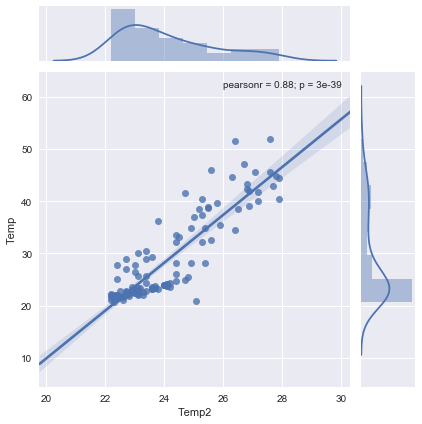

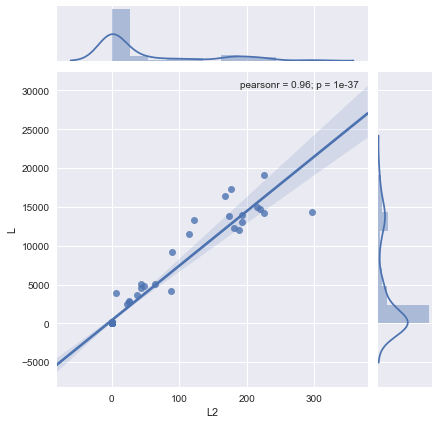

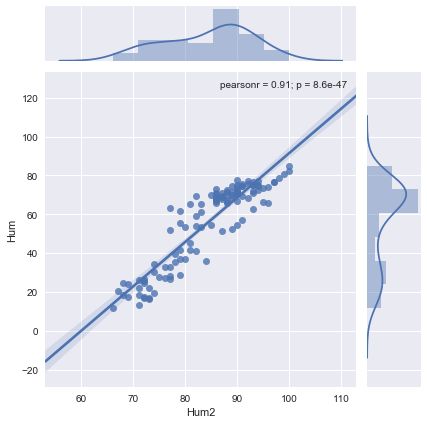

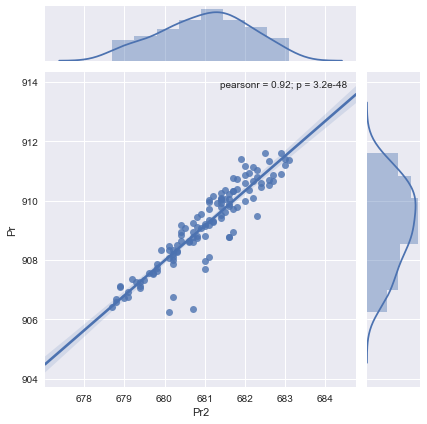

In [43]:
sns.jointplot(data=df,x='Temp2',y='Temp', kind='reg')
sns.jointplot(data=df[df.L2<600],x='L2',y='L', kind='reg')
sns.jointplot(data=df,x='Hum2',y='Hum', kind='reg')
sns.jointplot(data=df,x='Pr2',y='Pr', kind='reg')


### ¿Cuantos valores hay validos para la el parametro L?

In [44]:
df2= df[df.L2<600 ].dropna()
df2.L.count()

66

## CALIBRACION DE SENSORES

Xm+B polyfit

In [45]:
print('')
print('Temperature[C]')
print(polyfitEq(df['Temp'],df['Temp2']))
print('')
print('Humidity[%]')
print(polyfitEq(df['Hum'],df['Hum2']))
print('')
print('Pression[mb]')
print(polyfitEq(df['Pr'],df['Pr2']))
print('')
print('Radiation[mb]')
df_l=df[df.L2<600 ].dropna()
print(polyfitEq(df_l['L'],df_l['L2']))


Temperature[C]
y = x*0.1688896859403191 + 19.265576344271782

Humidity[%]
y = x*0.3647440519259984 + 64.02510521599481

Pression[mb]
y = x*0.7182389783230818 + 28.01007387176966

Radiation[mb]
y = x*0.013153785956325843 + -1.6451526314835176


Generate a Calibrated Dataframe

In [46]:
df_l=df[df.L2<600 ].dropna()
result_md="""# Pruebas de calibraci/on de sensores de meteorolog/ia

Se usan los notebooks presentes en esta carpeta para generar las variables de calibraci/on de los sensores usados en el proyecto Arduair.
## Estructura:

### Datos de entrada
**DATA.TXT:** Datos generados por el dispositivo Arduair, formato csv
**DATA_CIUDADELA.TXT:** Datos generados por la estaci/on ubicada en Colombia/Sder/Bmanga, barrio real de minas, propiedad de la CDMB

### Procesamiento
**Test.ipynb:** Algunas pruebas de funcionamiento de Jupyter y pandas.
**Raw meteorology data processing.ipynb:** Adecuaci/on de los datos generados por el dispositivo Arduair
**Raw estaci/on meteorology data processing.ipynb:** Adecuaci/n de los datos generados por la estaci/on
**comparison.ipynb:** Generaci/on de resultados

### Resultados### Procesamiento
**Test.ipynb:** Algunas pruebas de funcionamiento de Jupyter y pandas.
**Raw meteorology data processing.ipynb:** Adecuaci/on de los datos generados por el dispositivo Arduair
**Raw estaci/on meteorology data processing.ipynb:** Adecuaci/on de los datos generados

**Temperature[C]**
{}

**Humidity[%]**
{}

**Pression[mmHg]**
{}

**Radiation[W/m2]**
{}
""".format(
polyfitEq(df['Temp'],df['Temp2']),
polyfitEq(df['Hum'],df['Hum2']),
polyfitEq(df['Pr'],df['Pr2']),
polyfitEq(df_l['L'],df_l['L2'])
)
file = open('README.md', 'r+')
file.write(result_md)

1341

,datetime [W/m2],L [W/m2],L stc_cdmb [W/m2]
5,2017-03-24 17:00:00,159.630829,181.0
6,2017-03-24 18:00:00,34.423316,25.0
7,2017-03-24 19:00:00,-1.065279,0.0
11,2017-03-24 23:00:00,-1.638707,0.0
12,2017-03-25 00:00:00,-1.638707,0.0


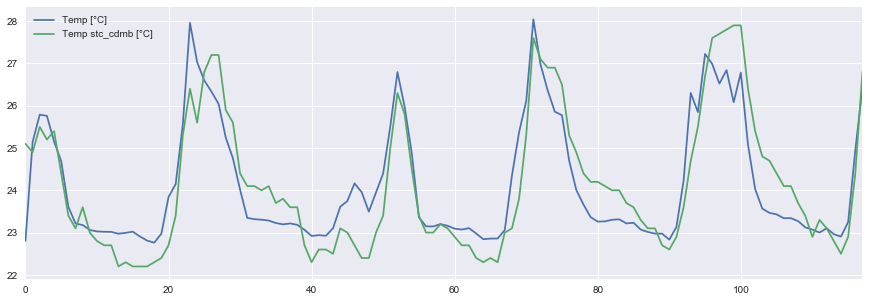

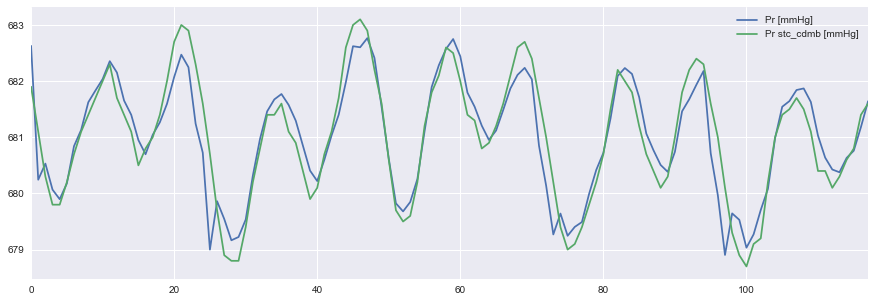

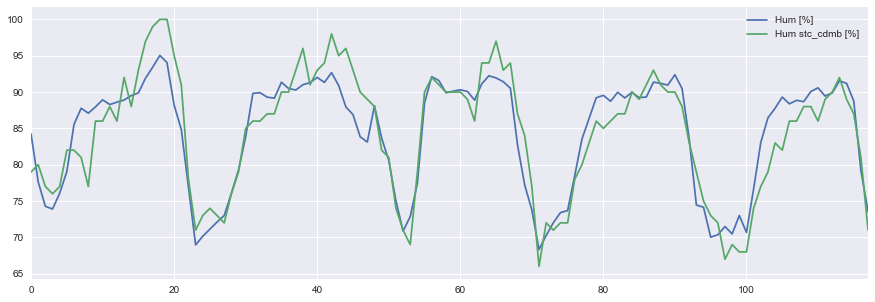

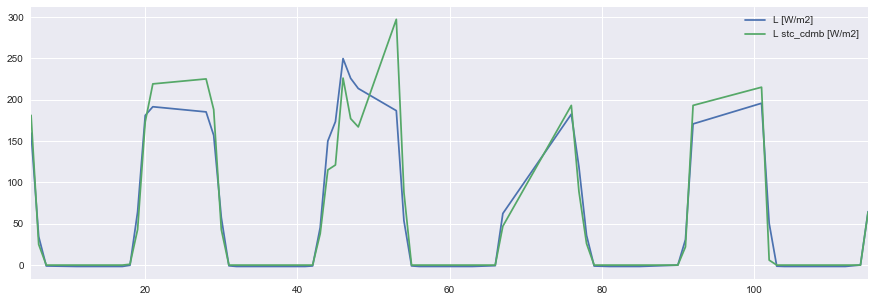

In [47]:
#GENERATE A CALIBRATE DATASETS
df_temp=df[['datetime','Temp','Temp2']]
df_temp['Temp']=calibrate(df['Temp'],df['Temp2'])

df_hum=df[['datetime','Hum','Hum2']]
df_hum['Hum']=calibrate(df['Hum'],df['Hum2'])

df_pr=df[['datetime','Pr','Pr2']]
df_pr['Pr']=calibrate(df['Pr'],df['Pr2'])

df_l=df[df.L2<600 ].dropna()
df_l=df_l[['datetime','L','L2']]
df_l['L']=calibrate(df_l['L'],df_l['L2'])

# Rename columns

df_temp.columns=rename_labels(df_temp,'[°C]')
df_hum.columns=rename_labels(df_hum,'[%]')
df_pr.columns=rename_labels(df_pr,'[mmHg]')
df_l.columns=rename_labels(df_l,'[W/m2]')

#Plot
df_temp.plot(figsize=[15,5])
df_pr.plot(figsize=[15,5])
df_hum.plot(figsize=[15,5])
df_l.plot(figsize=[15,5])
df_l.head()

### ¿Que pasa si elimino los momentos de lluvia cuando comparo las temperatura?

In [48]:
# Filtro los datos
df_temp_prep=df[df.Prep<=0]
# Conclusion: a este nivel de datos no se ve afectacion aparente de la correlacion
df_temp_prep[['Temp','Temp2']].corr()

,Temp,Temp2
Temp,1.000000,0.876727
Temp2,0.876727,1.000000


**Respuesta:** Parece que no tiene efecto alguno sobre la correlacion 

# Graficas correctamente formateadas

C:\Users\fega0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


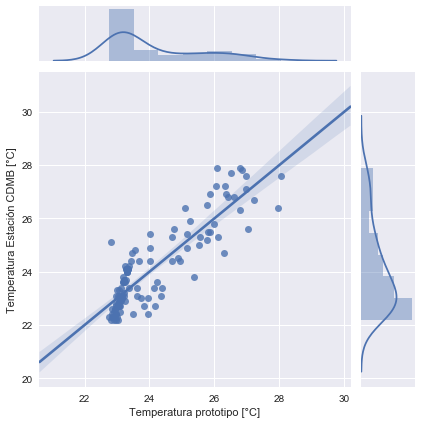

In [49]:
df_temp.columns = ['datetime','Temperatura prototipo [°C]','Temperatura Estación CDMB [°C]']
sns.jointplot(data=df_temp,x='Temperatura prototipo [°C]',y='Temperatura Estación CDMB [°C]', kind='reg', stat_func=None)

C:\Users\fega0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


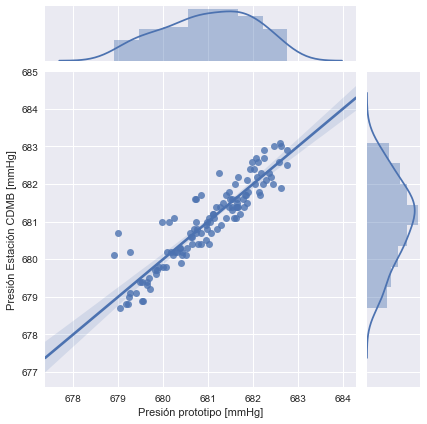

In [50]:
df_pr.columns = ['datetime','Presión prototipo [mmHg]','Presión Estación CDMB [mmHg]']
sns.jointplot(data=df_pr,x='Presión prototipo [mmHg]',y='Presión Estación CDMB [mmHg]', kind='reg', stat_func=None)

C:\Users\fega0\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


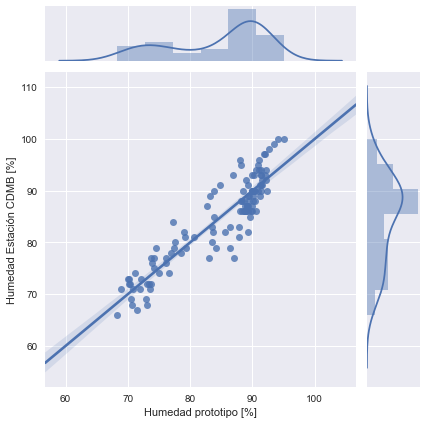

In [55]:
df_hum.columns = ['datetime','Humedad prototipo [%]','Humedad Estación CDMB [%]']
sns.jointplot(data=df_hum,x='Humedad prototipo [%]',y='Humedad Estación CDMB [%]', kind='reg', stat_func=None)

In [ ]:
df_l.columns = ['datetime','Irradiancia prototipo [W/m2]','Irradiancia Estación CDMB [W/m2]']
sns.jointplot(data=df_l,x='Irradiancia prototipo [W/m2]',y='Irradiancia Estación CDMB [W/m2]', kind='reg',xlim={0,300},ylim={0,300}, stat_func=None)

df_l.head()